# Data Pre Processing for Sharing Session
22 July 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib
plt.rcParams['figure.figsize'] = 9,6
plt.rcParams.update({'font.size':16})

# Seaborn
sns.set_style('whitegrid')
sns.set_palette('PuBuGn_d')

# sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df_raw = pd.read_csv('https://static.turi.com/datasets/lending_club/loanStats.csv')

C:\Users\Villano\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Filter Loan Status
- Fully Paid =  "good" loan
- Charged Off + Default = "bad" loan

In [3]:
filter_list = ['Fully Paid', 'Default', 'Charged Off']

df = df_raw.loc[df_raw.loan_status.isin(filter_list)]

Left with 119,939 Rows

#### Select Features

In [4]:
features = ["annual_inc",
            "delinq_2yrs",
            "dti",
            "emp_length_num",
            "funded_amnt",
            "grade_num",
            "home_ownership",
            "installment",
            "int_rate",
            "last_pymnt_amnt",
            "loan_amnt",
            "loan_status",
            "mths_since_last_delinq",
            "mths_since_last_major_derog",
            "open_acc",
            "revol_util",
            "term",
            "total_acc",
            "total_pymnt",
            "total_rec_late_fee",]

df = df.loc[:, df.columns.isin(features)]

### Map Loan Status

In [5]:
map_loan_status = dict(zip(filter_list,[1,0,0]))

In [6]:
df['good_loan'] = df.loan_status.apply(lambda x: map_loan_status[x])

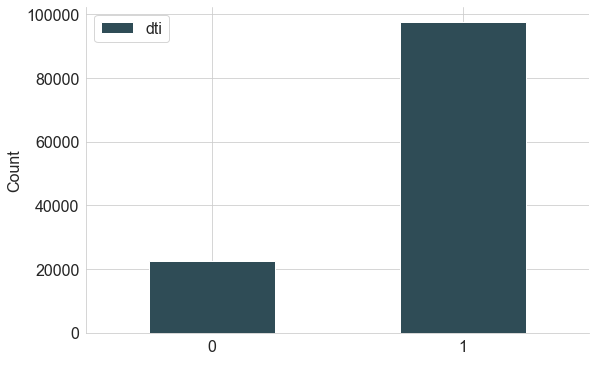

In [7]:
fig, ax = plt.subplots()
df[['good_loan','dti']].groupby('good_loan').count().plot(kind='bar', ax = ax, rot = 0)
ax.set_xlabel(' ')
ax.set_ylabel('Count')
sns.despine()
plt.show()

Remove <i>loan_status</i>

In [8]:
df = df.loc[:, df.columns!='loan_status']

One Hot Encoding

In [9]:
df = pd.concat([df.loc[:,df.columns != 'home_ownership'].reset_index(drop=True),
               pd.get_dummies(df[['home_ownership']]).reset_index(drop=True)], axis = 1)

Encode term as numeric

In [10]:
df['term'] = df.term.str[:3].apply(lambda x: x.strip()).astype('int64')

### Split to Train and Test

- Sample in such a way to minimize the imbalanced nature of the data.
- Use only 50,000 for train and 1,000 for test

In [11]:
np.random.seed(69)
df_samp_good = df.loc[df.good_loan == 1, :].sample(n=30600)
df_samp_bad  = df.loc[df.good_loan == 0, :].sample(n=20400)

In [12]:
X_train = pd.concat([df_samp_good.iloc[:30000,:],
                    df_samp_bad.iloc[:20000,:]
                            ])

X_test = pd.concat([df_samp_good.iloc[30000:,:],
                   df_samp_bad.iloc[20000:,:]
                  ])

In [13]:
y_train, y_test = X_train.loc[:, X_train.columns == 'good_loan'], X_test.loc[:, X_test.columns == 'good_loan']
X_train, X_test = X_train.loc[:, X_train.columns != 'good_loan'], X_test.loc[:, X_test.columns != 'good_loan']

#### Export

In [15]:
X_train.to_csv('../Data_Hands-on/X_train.csv', index = False)
X_test.to_csv('../Data_Hands-on/X_test.csv'  , index = False)
y_train.to_csv('../Data_Hands-on/y_train.csv', index = False)
y_test.to_csv('../Data_Hands-on/y_test.csv'  , index = False)